[View in Colaboratory](https://colab.research.google.com/github/gezhouz/PythonDataScienceHandbook/blob/master/assignment2_q2_(1).ipynb)

In [0]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
%matplotlib inline
import numpy as np
from numpy.linalg import *
from scipy.io import loadmat
import pandas as pd
import scipy as sp

In [2]:
X_train = loadmat('Ion.trin.mat')['Xtrain']

FileNotFoundError: ignored

In [0]:
X_train.shape

(33, 176)

In [0]:
Y_train = loadmat('Ion.trin.mat')['ytrain']

In [0]:
Y_train.shape

(176, 1)

In [0]:
Y_train[0]

array([0], dtype=uint8)

In [0]:
test = loadmat('Ion.test.mat')

In [0]:
test['Xtest'].shape

(33, 175)

In [0]:
X_test=test['Xtest']

In [0]:
Y_test=test["ytest"]

In [0]:
Y_test.shape

(175, 1)

In [0]:
a= 1

$$\delta_i= W_{i+1}^T\delta_{i+1}\circ f_i^`(W_ix_{i-1})$$
where $$\circ$$  is the Hadamard product

In [0]:
X_0 = X_train[:,0].reshape(33,1)

In [0]:
class NN(): #bias = 0 
    def __init__(self,layer_dims,lr,alpha,**arg):##layer_dims is the d of each layer
        #self.x = x 
        #self.y = y
        self.alpha = alpha
        self.lr = lr
        self.n_layers = len(layer_dims)
        self.weights ={}
        self.cache = {}
        self.delta = {}
        self.train_data = 0
        
        for n in range(1,self.n_layers):
            self.weights['W'+str(n)+str(n+1)] = np.random.randn(layer_dims[n],layer_dims[n-1])*0.01
            #self.weights['W'+str(n)+str(n+1)] = np.ones((layer_dims[n],layer_dims[n-1]))*0.001
    def sigmoid(self,A):# z is the output after the sigmoid and a is the 
        Z = 1/(1+np.exp(-A))
        return Z
    def layer_forward(self,Z_prev,W):
        A = np.dot(W,Z_prev)
        Z = self.sigmoid(A)
        return A, Z
    
        
    def feed_forward(self,train_data):#activation function is sigmoid
        self.train_data =train_data
        Z = train_data ## start at input layer x
        L = len(self.weights)
        for n in range(1,L): # for the following layers the latter input = the previous's output
            Z_prev = Z
            A,Z = self.layer_forward(Z_prev,self.weights['W'+str(n)+str(n+1)])
            self.cache['A'+str(n)] = A
            self.cache['Z'+str(n)] = Z
                
        AL,ZL = self.layer_forward(Z,self.weights['W'+str(L)+str(L+1)])
        self.cache['AL'] = AL
        self.cache['ZL'] = ZL
    def dsigmoid(self,A):
        return self.sigmoid(A)*(1-self.sigmoid(A))###???
    
    
    def back_propagation(self,y):
        yh = self.cache['ZL']
        L =len(self.weights)
        #self.delta['delta_'+str(L)] = 2*np.linalg.norm(y-yh).reshape(1,1)
        self.delta['delta_'+str(L)] = -2*(y-yh).reshape(1,1)
        #######what is y is not determined yet
        #self.delta['delta_'+str(L)] = 2*abs(y-yh).reshape(1,1)
        #self.delta['delta_L'] = 2*np.linalg.norm(1-yh).reshape(1,1)
        deltan = self.delta['delta_'+str(L)]
        #deltan = self.delta['delta_L']
        for n in range(L-1,0,-1):
            An = self.cache['A'+str(n)]
            Wn = self.weights['W'+str(n+1)+str(n+2)]
            #self.delta['delta_'+str(n)] = np.linalg.multi_dot([self.dsigmoid(An),deltan,Wn])
            self.delta['delta_'+str(n)] = np.dot(Wn.T,deltan)*self.dsigmoid(An)
            deltan =  self.delta['delta_'+str(n)] #8*8
        #get all the delta in self.delta

            #pass
    def weight_update(self):
        L = len(self.delta)
        for i in range(1,L+1):
            if i ==1:
                Z_prev = self.train_data
                #with weigth decay
                #self.weights['W'+str(i)+str(i+1)]=self.weights['W'+str(i)+str(i+1)] - self.lr*self.delta['delta_'+str(i)]@(Z_prev.T)-self.lr*self.alpha*self.weights['W'+str(i)+str(i+1)]
                #self.weights['W'+str(i)+str(i+1)]=self.weights['W'+str(i)+str(i+1)] - self.lr*self.delta['delta_'+str(i)]@(Z_prev.T)
                self.weights['W'+str(i)+str(i+1)]=(1-self.alpha)*self.weights['W'+str(i)+str(i+1)] - self.lr*self.delta['delta_'+str(i)]@(Z_prev.T)
                #self.weights['W'+str(i)+str(i+1)]=self.weights['W'+str(i)+str(i+1)] + self.lr*self.delta['delta_'+str(i)]@(Z_prev.T)
            else:
                
                Z_prev = self.cache['Z'+str(i-1)]
                #self.weights['W'+str(i)+str(i+1)]=self.weights['W'+str(i)+str(i+1)] - self.lr*self.delta['delta_'+str(i)]@(Z_prev.T)-self.lr*self.alpha*self.weights['W'+str(i)+str(i+1)]
                #self.weights['W'+str(i)+str(i+1)]=self.weights['W'+str(i)+str(i+1)] - self.lr*self.delta['delta_'+str(i)]@(Z_prev.T)
                self.weights['W'+str(i)+str(i+1)]=(1-self.alpha)*self.weights['W'+str(i)+str(i+1)] - self.lr*self.delta['delta_'+str(i)]@(Z_prev.T)
                #self.weights['W'+str(i)+str(i+1)]=self.weights['W'+str(i)+str(i+1)] + self.lr*self.delta['delta_'+str(i)]@(Z_prev.T)
            
            
        
    #def error(self):
        #y = self.y
        #yh = self.cache['AL']
        #error = np.linalg.norm(y-yh)*np.linalg.norm(y-yh)
        #return error
        #pass
    
        

In [0]:
len(Y_train)

176

In [0]:
def train_model(X_train,Y_train,epoch=1,model = NN([33,11,1],0.1,0)):
    total_error_list =[]
    epoch =epoch
    model =model
    #model = NN([33,10,1],lr,alpha)
    for e in range(epoch):
        errorlist = []
        #print(e)
        for i in range(176) :
            model.feed_forward(X_train[:,i].reshape(33,1))
            model.back_propagation(Y_train[:,i].reshape(1,1))
            model.weight_update()
            #error = Y_train[:,i].reshape(1,1) - model.cache['AL']
            #print ('ZL=   ',model.cache['ZL'])
            #print("Y = ",Y_train[:,i])
            error = np.linalg.norm(Y_train[:,i].reshape(1,1) - model.cache['ZL'])
            #print(error)
        
            errorlist.append(error)
        total_error = np.linalg.norm(errorlist)
        #print (total_error)
        total_error_list.append(total_error)
    train_error = sum(total_error_list)#/len(total_error_list)
    #train_error = np.linalg.norm(total_error_list)
    return train_error,model,total_error_list#, model.cache
    

In [0]:
norm(4-5)

1.0

In [0]:
def fit_model(X_test,Y_test,model):
    model = model
    error_list =[] 
    predict_list = []
    L = len(Y_test)
    for i in range(L):
        model.feed_forward(X_test[:,i].reshape(33,1))
        predict = model.cache['ZL']
        #print(predict)
        predict_list.append(predict)
        error = np.linalg.norm(Y_test.T[:,i].reshape(1,1) - predict)
        error_list.append(error)
    #test_error = sum(error_list)
    test_error = np.linalg.norm(error_list)
    return test_error,predict_list

In [0]:
fit_model(X_test,Y_test,NN([33,8,1],0.1,0))

(6.627355012659669,
 [array([[0.50350605]]),
  array([[0.50348212]]),
  array([[0.5034112]]),
  array([[0.50345098]]),
  array([[0.50349749]]),
  array([[0.50345473]]),
  array([[0.50344192]]),
  array([[0.50344655]]),
  array([[0.50333154]]),
  array([[0.50344684]]),
  array([[0.50342051]]),
  array([[0.50343042]]),
  array([[0.50345515]]),
  array([[0.50346256]]),
  array([[0.50335996]]),
  array([[0.50347241]]),
  array([[0.5034135]]),
  array([[0.5034349]]),
  array([[0.50342509]]),
  array([[0.50343573]]),
  array([[0.50344934]]),
  array([[0.50342017]]),
  array([[0.50333388]]),
  array([[0.50342895]]),
  array([[0.50333817]]),
  array([[0.50338857]]),
  array([[0.50336371]]),
  array([[0.50338698]]),
  array([[0.50347574]]),
  array([[0.50344017]]),
  array([[0.50354118]]),
  array([[0.50335821]]),
  array([[0.5034736]]),
  array([[0.5033972]]),
  array([[0.50347675]]),
  array([[0.50345833]]),
  array([[0.50342296]]),
  array([[0.50344438]]),
  array([[0.50344231]]),
  array([[

In [0]:
Y_test.shape

(175, 1)

In [0]:
def train_test_plot(X_train,Y_train,X_test,Y_test,lr,alpha,epoch,model):
    epoch = epoch
    lr =lr 
    train_error_list = []
    test_error_list=[]
    alpha = alpha
    predict_list=[]
    train_error,model,total_error_list = train_model(X_train,Y_train.T,1,model)
    for i in range(epoch):
        train_error,model,total_error_list = train_model(X_train,Y_train.T,epoch=1,model=model)
        #print (train_error,total_error_list)
        test_error,predict_list_1 = fit_model(X_test,Y_test,model)
        train_error_list.append(train_error)
        test_error_list.append(test_error)
        predict_list.append(predict_list_1)
        model = model
    plt.plot(train_error_list,label='train_error')
    plt.plot(test_error_list,label='test_error')
    plt.ylim(0,8)
    plt.legend()
    plt.xlabel('Number of Epochs')
    plt.ylabel('Norm Error')
    return train_error_list,test_error_list,predict_list

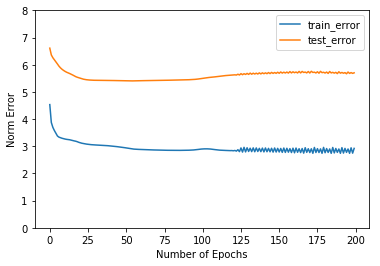

In [0]:
a,b,c=train_test_plot(X_train,Y_train,X_test,Y_test,0.2,0,200,NN([33,20,1],0.3,0.0015))

In [0]:
k=(np.array(c[20])>0.5).astype(int)
prediction =[]
for i in range(len(k)):
    prediction.append(k[i][0])
    
    

In [0]:
sum(prediction -Y_test)

array([-37])

In [0]:
k

array([[[1]],

       [[0]],

       [[0]],

       [[1]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[1]],

       [[1]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[1]],

       [[1]],

       [[0]],

       [[1]],

       [[1]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[1]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[1]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[1]],

       [[0]],

       [[0]],

       [[0]],

       [[0

In [0]:
Y_test

array([[1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [0]:
train_error,model_train,total_er = train_model(X_train,Y_train.T,0.1,0,epoch=10)

In [0]:
total_er

[5.8549336488380135,
 5.731541034945887,
 4.768405479224534,
 4.032604408806568,
 3.6476167459677384,
 3.3722915487940193,
 3.160654567978825,
 3.003512519767508,
 2.8801916781675128,
 2.7678016878052567]

In [0]:
 errorl,pl=fit_model(X_train,Y_train.T,model_train)

In [0]:
pl

[array([[0.03372899]]),
 array([[0.0374504]]),
 array([[0.03348179]]),
 array([[0.03339531]]),
 array([[0.03771007]]),
 array([[0.03327022]]),
 array([[0.03296679]]),
 array([[0.03365288]]),
 array([[0.03649524]]),
 array([[0.03426642]]),
 array([[0.04240678]]),
 array([[0.03370592]]),
 array([[0.04122826]]),
 array([[0.04148169]]),
 array([[0.03288207]]),
 array([[0.03923347]]),
 array([[0.03509795]]),
 array([[0.03270132]]),
 array([[0.03623298]]),
 array([[0.03807831]]),
 array([[0.03423882]]),
 array([[0.03360232]]),
 array([[0.03706974]]),
 array([[0.03343245]]),
 array([[0.04510299]]),
 array([[0.03389096]]),
 array([[0.03337135]]),
 array([[0.04409116]]),
 array([[0.03688295]]),
 array([[0.03731106]]),
 array([[0.02552372]]),
 array([[0.03264765]]),
 array([[0.03364872]]),
 array([[0.04366049]]),
 array([[0.03331758]]),
 array([[0.03311242]]),
 array([[0.03324476]]),
 array([[0.03947883]]),
 array([[0.02689452]]),
 array([[0.03377854]]),
 array([[0.03335464]]),
 array([[0.036011

In [0]:
errorl=[a for a in errorl if a>0.5]
np.linalg.norm(errorl)

7.640404749686911

In [0]:
a = [1,2,3]


In [0]:
norm(a)**2

14.0

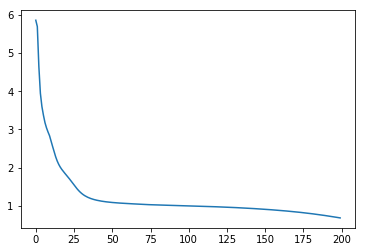

In [0]:
plt.plot(total_er)


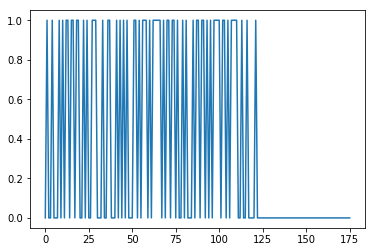

In [0]:
plt.plot(Y_train)

In [0]:
Y_train

In [0]:
np.linalg.norm(model)

In [0]:
X_train[:,175].reshape(33,1)

In [0]:
YNEW = Y_train.T

In [0]:
YNEW[:,0].reshape(1,1)

In [0]:
NN=NN(X_train[:,0].reshape(33,1),Y_train[0],layer_dims=[33,2,2,1],lr=0.01)

In [0]:
NN.feed_forward()

In [0]:
NN.back_propagation()

In [0]:
NN.weights.keys()

In [0]:
NN.weight_update()

In [0]:
NN.error()

In [0]:
NN.cache.keys()

In [0]:
len(NN.weights)

In [0]:
NN.delta#.keys()

In [0]:
NN.weights['W34'].shape

In [0]:
NN.dsigmoid(NN.cache['A1']).shape

In [0]:
for l in range(1,0,-1):
    print (l)

In [0]:
np.linalg.norm(2-1)

In [0]:
NN.weights['W34'].shape

In [0]:
testar= NN.cache['A1']

In [0]:
NN.dsigmoid(testar)

In [0]:
NN.cache['Z1']

In [0]:
NN.cache['Z1'].shape

In [0]:
NN.layer_forward(X_0,np.random.randn(8,33))

In [0]:
a =1 

In [0]:
a =np.array([1])
a.reshape(1,1).shape


In [0]:
A = 0
Z = 1/(1+np.exp(-A))
Z

In [0]:
for keys in NN.weights.keys():
    print (keys)
    print (NN.weights[str(keys)].shape)

In [0]:
test ={}
NEXT =(1,0)
K=3
for n in range(1,K-1): # for the following layers the latter input = the previous's output
            A,Z = NEXT
            test['A'+str(n)] = A
            test['Z'+str(n)] = Z
            ANEXT= A+1
            ZNEXT= Z+1
            NEXT = (ANEXT,ZNEXT)
            print (n)
                

In [0]:
test

In [0]:
AL,ZL = NEXT
test['AL'] = AL
test['ZL'] = ZL

In [0]:
test

In [0]:
for i in range(1,len(trlist)):
    print (i)

In [0]:
trlist =[1,2,3]